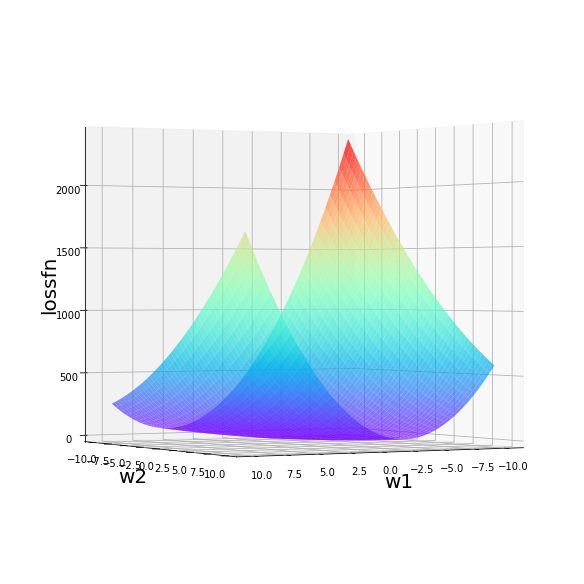

In [5]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
import numpy as np

w1 = np.arange(-10,10,0.05)
w2 = np.arange(-10,10,0.05)
w1, w2 = np.meshgrid(w1, w2)
lossfn = (2 - w1 - w2)**2 + (4 - 3*w1 - w2)**2

#定义一个绘制三维图像的函数
#elev表示上下旋转的角度
#azim表示平行旋转的角度

def plot_3D(elev=45,azim=60,X=w1,y=w2):
    fig, ax = plt.subplots(1, 1,constrained_layout=True, figsize=(8, 8))
    ax = plt.subplot(projection="3d")
    ax.plot_surface(w1, w2, lossfn, cmap='rainbow',alpha=0.7)
    ax.view_init(elev=elev,azim=azim)
    #ax.xticks([-10,-5,0,5,10])
    ax.set_xlabel("w1",fontsize=20)
    ax.set_ylabel("w2",fontsize=20)
    ax.set_zlabel("lossfn",fontsize=20)
    plt.show()

from ipywidgets import interact,fixed
interact(plot_3D,elev=[0,15,30],azip=(-180,180),X=fixed(w1),y=fixed(w2))
plt.show()

In [26]:
import torch

In [27]:
x = torch.tensor(1,requires_grad=True, dtype=torch.float32)

In [28]:
z = x**2

In [29]:
y = torch.tensor(2,requires_grad=False, dtype=torch.float32)

In [30]:
sigma = torch.sigmoid(z) 

In [31]:
loss = -(y*torch.log(sigma) + (1-y)*torch.log(1-sigma))

In [33]:
torch.autograd.grad(loss,x)

(tensor(-2.5379),)

In [ ]:
#3分类，500个样本，20个特征，共3层，第一层13个神经元，第二层8个神经元
#第一层的激活函数时relu，第二层的激活函数是sigmoid

In [43]:
import torch
import torch.nn as nn
from torch.nn import CrossEntropyLoss as CEL
from torch.nn import functional as F

In [ ]:
#确定数据

In [38]:
torch.manual_seed(420)
X = torch.rand((500,20),dtype=torch.float32) * 100
y = torch.randint(low=0,high=3,size=(500,),dtype=torch.float32)

In [39]:
y.unique()

tensor([0., 1., 2.])

In [40]:
input_ = X.shape[1]
output_ = len(y.unique())

In [ ]:
#定义神经网络的架构
#logsoftmax + NLLloss / CrossEntropyLoss
#BCE,BCEWithLogitsLoss

In [37]:
class Model(nn.Module):
    def __init__(self,in_features=40,out_features=2):
        super().__init__()
        self.linear1 = nn.Linear(in_features,13,bias=False)
        self.linear2 = nn.Linear(13,8,bias=False)
        self.output = nn.Linear(8,out_features,bias=True)
    
    def forward(self, x):
        sigma1 = torch.relu(self.linear1(x))
        sigma2 = torch.sigmoid(self.linear2(sigma1))
        zhat = self.output(sigma2)
        return zhat

In [66]:
torch.manual_seed(420)
net = Model(in_features=input_, out_features=output_)

In [67]:
zhat = net.forward(X)

In [53]:
#定义损失函数
criterion = CEL()

In [68]:
loss = criterion(zhat, y.long())

In [69]:
loss

tensor(1.1559, grad_fn=<NllLossBackward>)

In [60]:
net.linear1.weight.grad #还没有梯度

In [70]:
loss.backward(retain_graph=True)

In [73]:
net.linear1.weight.grad

tensor([[-6.0588e-04, -1.4974e-04, -7.3415e-04, -7.7351e-05, -2.6140e-04,
         -1.1693e-04, -6.6626e-04, -5.1727e-04, -1.8854e-04, -8.5235e-05,
         -1.5836e-04, -3.0359e-04, -1.8416e-04, -6.5027e-04, -2.1789e-04,
         -1.3007e-04, -2.6011e-04, -8.8230e-06, -1.9348e-04, -1.7094e-04],
        [ 2.0197e-02, -1.9837e-03,  2.4011e-02,  2.0821e-03,  1.0392e-02,
          7.1134e-03,  1.2124e-02,  7.9953e-03,  2.9962e-02,  1.8190e-02,
          1.2186e-02,  1.5038e-02,  2.7777e-02,  2.3854e-03,  1.7961e-02,
          1.9643e-02,  3.5274e-02,  2.0755e-02,  3.3555e-03,  1.5672e-03],
        [-2.0935e-02,  1.5948e-02,  6.0700e-03,  1.4997e-02,  8.6460e-03,
          1.9749e-03,  1.8516e-02,  1.2732e-02, -1.1614e-02,  2.3176e-03,
         -5.3246e-03,  1.2712e-02, -5.8676e-03, -8.9849e-03, -1.0081e-02,
          1.6878e-02, -2.0688e-02, -1.7009e-02,  4.2748e-03, -2.4894e-03],
        [-2.6928e-02, -2.1060e-02, -1.6663e-02, -3.1295e-02, -2.4752e-02,
         -3.2839e-02, -1.9562e-02, 

In [64]:
net.linear1.weight.shape

torch.Size([13, 20])

In [74]:
loss.backward()

RuntimeError: Trying to backward through the graph a second time, but the saved intermediate results have already been freed. Specify retain_graph=True when calling backward the first time.